# SI 330: Homework 3 - To tokenize, or not to tokenize, that is the question: Natural language processing of Shakespearean text with NLTK


## Due: Friday, February 2, 2018,  11:59:00pm

### Submission instructions
After completing this homework, you will turn in three files via Canvas ->  Assignments -> Lab 3:
Your Notebook, named si330-hw3-YOUR_UNIQUE_NAME.ipynb and
the HTML file, named si330-hw3-YOUR_UNIQUE_NAME.html

### Name:  Libby Murray 
### Uniqname: 90594386
### People you worked with: Rhea Cheeti

## Top-Level Goal
To use NLP techniques to determine which characters in Shakespeare's play "Hamlet" are most similar to each other, based on their spoken lines.

## Learning Objectives
After completing this Lab, you should know how to:
* use NLTK to normalize and tokenize text data
* calculate type-token ratios (TTR)
* use NLTK to extract n-grams
* calculate document similarity using cosines


### Note: Suggestions for going "Above and Beyond" 80% are highlighted throughout this notebook.

### Outline of Steps For Analysis
Here's an overview of the steps that you'll need to do to complete this lab.
1. Load the raw text
2. Iterate through the text, extracting the character and the lines that they say and tokenize the spoken lines.
3. Normalize the text
4. Remove stopwords
5. Calculate type-token ration for each character
6. (Only when repeating for bigrams and trigrams): Generate n-grams
7. Calculate cosine similarity between each character (we supply the functions to do this)
8. List the top 10 most similar characters, based on cosine similarity of the lines they say
9. Visualize the results (we supply the code)
10. Repeat steps 4 to 7 with bigrams (n-grams where n=2) and trigrams (n-grams where n=3)

Each of these steps is detailed below.

Before we start the analysis, let's load the libraries that we'll need.  You should recognize re, nltk, and defaultdict (from collections).  We're also going to peek into the future of this course and use some functionality from pandas (which some of you have already used) and we're going to do some plotting so we'll use matplotlib and Seaborn.  You'll learn more about those later in the course; for now, we're just going to give you code that uses those libraries.

**NOTE: If the next code cell fails because of missing libraries, install them like you installed nltk (look at the lab for instructions on how to do that)**

In [1]:
import re
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
from collections import defaultdict
%matplotlib inline

## Step 1: Load the text

Just like we did in the lab, we're going to load the text from one of NLTK's corpora (in this case, the tragic play "Hamlet") into a variable and print the first 500 or so characters.

**NOTE: If you print substantially more than 500 characters, make sure you clear your output before saving your
notebook.  Failing to do so may make your notebook unopenable in future sessions.**

In [2]:
raw_text = nltk.corpus.gutenberg.raw('shakespeare-hamlet.txt')
    

# Print the first 500 characters of the text.
print(raw_text[:500])

[The Tragedie of Hamlet by William Shakespeare 1599]


Actus Primus. Scoena Prima.

Enter Barnardo and Francisco two Centinels.

  Barnardo. Who's there?
  Fran. Nay answer me: Stand & vnfold
your selfe

   Bar. Long liue the King

   Fran. Barnardo?
  Bar. He

   Fran. You come most carefully vpon your houre

   Bar. 'Tis now strook twelue, get thee to bed Francisco

   Fran. For this releefe much thankes: 'Tis bitter cold,
And I am sicke at heart

   Barn. Haue you had quiet Guard?
  Fran. Not


Next, we will retrieve the lines of a all the characters from the play and store in a dictionary.  You should store each sentence as a list. The value of your dictionary should be a list of lists for the character.

## Step 2: Split lines into character names and spoken lines and tokenize the spoken lines into 



We suggest you use a dictionary with the key being the character name and the value being a list of lists that correspond the sentences (the outer list) and the tokenized words (the inner lists)</font>
So you might get a dictionary with keys and values that look something like:

```
{'Bap': [['say', 'what', 'is', 'horatio', 'there'],
              ['welcome', 'horatio', 'welcome', 'good', 'marcellus'],
              ['i', 'haue', 'seene', 'nothing']]}
```
### <font color="magenta">Copy and modify the code you created in the lab to split the character name from their lines.</font>

In [23]:
#retrieve the lines of a all the characters from the play and store in a dictionary.
#you should store each sentence as a list

from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

tokenizer = RegexpTokenizer(r'\s{2,}([A-Z][a-z]{2,}\.)(.*?)(?=\s{2,})')  

word_tokens = tokenizer.tokenize(raw_text)

# print(word_tokens)





When you do this, you will notice that there seem to be a number of different abbreviations used for the same
characters.  For example, "Clown" is referred to as "Clo", "Clown" and "Clowne".  You should merge those multiple
abbreviations into the same character, using your best judgement about which ones are the same.  It would be best (**Above and Beyond**) to look up the actual list of characters (use Google) and map the abbreviations onto the
full names of the characters.  You should also use this opportunity to eliminate stage directions that managed
to slip through your regular expression and any other questionable lines.

One way to do this is to create a dictionary that maps abbreviations onto the canonical names and look up the values for each abbreviation.

### <font color="magenta">Write code to combine lines from different abbreviations of the same character name.</font>

In [24]:
name_lookup = {'Barnardo.': 'Bernardo', 
               'Fran.': 'Francisco', 
               'Bar.': 'Bernardo',
               'Barn.': 'Bernardo', 
               'Hor.': 'Horatio',
               'Mar.': 'Marcellus',
               'Fra.': 'Francisco',
               'Hora.': 'Horatio',
               'Exeunt.': None,
               'King.': 'Claudius',
               'Volt.': 'Voltimand',
               'Laer.': 'Laertes',
               'Pol.': 'Polonius',
               'Ham.': 'Hamlet',
               'Queen.': 'Gertrude', 
               'Both.': None,
               'All.' : None,
               'Ophel.': 'Ophelia', 
               'Ophe.': 'Ophelia',
               'Polon.': 'Polonius',
               'Horat.': 'Horatio',
               'Gho.': 'Ghost',
               'Ghost.': 'Ghost',
               'Marcell.': 'Marcellus', 
               'Reynol.': 'Reynaldo',
               'Rosin.': 'Rosencratz',
               'Guil.': 'Guildenstern',
               'Queene.': 'Gertrude',
               'Guild.': 'Guildenstern',
               'Play.': 'Player Queen',
               'Player.': 'Player Queen',
               'Bap.': 'Baptista',
               'Bapt.': 'Baptista',
               'Lucian.': 'Lucianus',
               'Hamlet.': 'Hamlet',
               'For.': 'Fortinbras',
               'Cap.': 'Captain',
               'Mes.': 'Messenger',
               'Ser.': 'Servant', 
               'Say.': 'Sailer',
               'Kin.': 'Claudius',
               'Clown.': 'Gravediggers',
               'Other.': None, 
               'Clo.': 'Gravediggers', 
               'Sings.': 'Musician',
               'Priest.': 'Priest',
               'Gen.': 'Gentlemen', 
               'Osr.': 'Osric', 
               'Osricke.': 'Osric',
               'Dyes.': 'Dyes',
               'Fortin.': 'Fortinbras',
               'Amb.': 'Ambassador'}


## Step 3: Normalize text
You know how to do this: use ```str.lower()```.
### <font color="magenta">Use str.lower() to normalize the spoken lines

In [31]:
name_dict = defaultdict(list)

for pair in word_tokens:
    if name_lookup[pair[0]]:
        name = name_lookup[pair[0]]
    val = pair[1].lower()
    tokenizer2 = RegexpTokenizer(r'[A-Za-z]+') 
    word_tokens2 = tokenizer2.tokenize(val)
    name_dict[name].append(word_tokens2)

# print(name_dict)  

## Step 4: Remove stopwords

You used stopwords in an earlier assignment.
**NOTE: When you work with bigrams and trigrams (see step 10), you should remove bigrams that
contain stopwords.  For example ('a','zebra') would be removed because 'a' is in the stopword list**.


### <font color="magenta">Remove stopwords from your list of words.</font>

In [33]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

filtered_wordsdict = defaultdict(list)

for k, v in name_dict.items():
    for lst in v:
        for word in lst:
            if word not in stop_words:
                filtered_words[k].append(word)
                
# print (filtered_words)

## Step 5:  Calculate type-token ratios for each character

We would like to compare the Type-Token Ratio (TTR) for the different cast members.
### <font color="magenta">Use the dictionary created previously and calculate total number of word types, word tokens, and type-token ratio for each character.</font>

Print the results in a readable, attractive format.</font>

In [34]:
for k, v in filtered_words.items():
    unique_words = defaultdict(int)
    for word in v:
        unique_words[word] += 1
    type_token_ratio = len(unique_words)/sum(unique_words.values())
    print("{}:,\n total number of word types = {},\n word tokens = {},\n type-token ratio = {}".format(k, len(unique_words), sum(unique_words.values()), type_token_ratio))

        

Bernardo:,
 total number of word types = 76,
 word tokens = 184,
 type-token ratio = 0.41304347826086957
Francisco:,
 total number of word types = 28,
 word tokens = 62,
 type-token ratio = 0.45161290322580644
Horatio:,
 total number of word types = 569,
 word tokens = 1740,
 type-token ratio = 0.32701149425287357
Marcellus:,
 total number of word types = 165,
 word tokens = 402,
 type-token ratio = 0.41044776119402987
Claudius:,
 total number of word types = 1125,
 word tokens = 4066,
 type-token ratio = 0.2766847024102312
Voltimand:,
 total number of word types = 77,
 word tokens = 160,
 type-token ratio = 0.48125
Laertes:,
 total number of word types = 484,
 word tokens = 1414,
 type-token ratio = 0.3422913719943423
Polonius:,
 total number of word types = 747,
 word tokens = 2584,
 type-token ratio = 0.28908668730650156
Hamlet:,
 total number of word types = 2368,
 word tokens = 10776,
 type-token ratio = 0.21974758723088345
Gertrude:,
 total number of word types = 141,
 word token

## Step 6: Generate n-grams (only when doing Step 10, see below)

The ```nltk.ngrams(words,n)``` function takes a list of words and a value of n, where n=2 for bigrams and n=3 for trigrams, and return a list of n-tuples.  You can use it to generate bigrams and trigrams.
### <font color="magenta">Use ```nltk.ngrams()``` to generate bigrams and trigrams as appropriate.

In [35]:
words = []
for lsts in name_dict.values():
    for lst in lsts:
        for word in lst:
            words.append(word)
            
bigrams = list(nltk.ngrams(words, 2))
trigrams = list(nltk.ngrams(words, 3))

filt_bigrams = []
for pair in bigrams:
    if pair[0] not in stop_words:
         if pair[1] not in stop_words:
                filt_bigrams.append(pair)
                
filt_trigrams = []
for trip in trigrams:
    if trip[0] not in stop_words:
         if trip[1] not in stop_words:
                if trip[2] not in stop_words:
                    filt_trigrams.append(trip)


## Step 7: Cosine similarity
We want to compare the similarity of two n-gram vectors.  A document is a collection of words so we can create a _vector_ of that document with as many dimensions as there are words, and a value (the word count) that represents the length of the vector on that axis.

Consider the following text:
>"This course is awesome."

We could create a vector representation of the normalized (i.e. lowercased) version of it:

|Word|Count|
|---|---|
|this | 1 | 
| course | 1 | 
| is | 1 |
| awesome | 1 |

Now let's take another text:

>"This course is a lot of work."

The vector representation of that (normalized) text would be:

| Word | Count | 
| --- | --- |
| this | 1 |
| course | 1 |
| is | 1 | 
| a | 1 |
| lot | 1 | 
| of | 1 |
| work | 1 |

If we "align" the two vectors, we get:

| Word | Count(D1) | Count(D2) |
| --- | --- | --- |
| this | 1 | 1 |
| course | 1 | 1 |
| is | 1 | 1 |
| awesome | 1 | 0 |
| a | 0 | 1 |
| lot | 0 | 1 | 
| of | 0 | 1 |
| work | 0 | 1 |

To calculate the cosine similarity, we take the dot product (also known as the inner product) of the two
vectors and "normalize" it to the length of the two vectors.

#### $cos(\theta)  = {\mathbf{A} \cdot \mathbf{B} \over \|\mathbf{A}\| \|\mathbf{B}\|}$

Here D1.D2 is the inner product. Let's say we have two word_count dictionaries, D1 = {"and": 3,"of": 2,"the": 5} and D2 =  {"and": 4,"in": 1,"of": 1,"this": 2}. The inner product for D1 and D2 = 14.0 

#### $cos(\theta) = 1$ means that the two documents are identical
#### $cos(\theta) = 0$ means that the two documents have no words in common

We have created the function <b>```cosine_similarity```</b> for you which will calculate the similarity measure. You will need to pass two dictionaries into the function, where the key is the n-gram and the value is the count for the n-gram.

In [16]:
import math

def cosine_similarity(D1,D2):
    """
    The input is a list of (word,freq) pairs.
    Return the angle between these two vectors.
    """
    numerator = inner_product(D1,D2)
    denominator = math.sqrt(inner_product(D1,D1)*inner_product(D2,D2))
    #return (math.acos(numerator/denominator)/math.pi) * 180
    return (numerator/denominator)

def inner_product(D1,D2):
    """
    Inner product between two vectors, where vectors
    are represented as dictionaries of (word,freq) pairs.
    Example: inner_product({"and":3,"of":2,"the":5},
                           {"and":4,"in":1,"of":1,"this":2}) = 14.0 
    """
    sum = 0.0
    for key in D1:
        if key in D2:
            sum += D1[key] * D2[key]
    return sum

Using the example from above:

In [17]:
d1 = {"this": 1, "course": 1, "is": 1, "awesome": 1, "a": 0, "lot": 0, "of": 0, "work": 0}
d1 = {"this": 1, "course": 1, "is": 1, "awesome": 0, "a": 1, "lot": 1, "of": 1, "work": 1}
cosine_similarity(d1,d2)

NameError: name 'd2' is not defined

If we have two vectors that point in the same direction but are different lengths, the
angle between them is 0 (i.e. they are identical):

In [18]:
d1 = {'a': 20, 'b': 30, 'c': 44}
d2 = {'a': 10, 'b': 15, 'c': 22}
cosine_similarity(d1,d2)

1.0

### <font color="magenta">Use the cosine_similarity function to generate a dictionary whose keys are 2-tuples of characters and values are the cosine similarity between them</font>
Elements should look something like:
```
(('King', 'Polonius'), 0.8332402081352969)
```

In [36]:
import itertools
from operator import itemgetter
chars = {}
for k, v in filtered_words.items():
    unique_words = defaultdict(int)
    for word in v:
        unique_words[word] += 1
    chars[k] = unique_words

similarities = {}

what = list(itertools.product(chars.keys(), chars.keys()))

for tup in what:
    if tup[0] == tup[1]:
        what.remove(tup)

for tup in what:
    first = tup[0]
    second = tup[1]
    similarities[(first, second)] = cosine_similarity(chars[first], chars[second])


## Step 8: Print the top 10 most similar characters, based on cosine similarity of what they said

In [20]:
similar = sorted(similarities.items(), key = lambda x: x[1], reverse = True)
print (similar[:20])

[(('Reynaldo', 'Guildenstern'), 0.739438993994632), (('Guildenstern', 'Reynaldo'), 0.739438993994632), (('Horatio', 'Reynaldo'), 0.7240090400962719), (('Reynaldo', 'Horatio'), 0.7240090400962719), (('Claudius', 'Hamlet'), 0.7067509189143314), (('Hamlet', 'Claudius'), 0.7067509189143314), (('Ophelia', 'Reynaldo'), 0.6953361604026007), (('Reynaldo', 'Ophelia'), 0.6953361604026007), (('Horatio', 'Ophelia'), 0.6947864245205476), (('Ophelia', 'Horatio'), 0.6947864245205476), (('Reynaldo', 'Rosencratz'), 0.6892687004455571), (('Rosencratz', 'Reynaldo'), 0.6892687004455571), (('Horatio', 'Rosencratz'), 0.678659944986035), (('Rosencratz', 'Horatio'), 0.678659944986035), (('Reynaldo', 'Gentlemen'), 0.6603381797442178), (('Gentlemen', 'Reynaldo'), 0.6603381797442178), (('Reynaldo', 'Captain'), 0.6469966392206304), (('Captain', 'Reynaldo'), 0.6469966392206304), (('Polonius', 'Hamlet'), 0.6388044769571106), (('Hamlet', 'Polonius'), 0.6388044769571106)]


## Step 9: Visualize the similarity matrix
We're jumping ahead a bit in this step, but we're supplying the code for you.  Assuming your data is in the
format specified in Step 7 (above), you should be able to simply run the next code block to generate a 
heatmap of the correlation matrix.

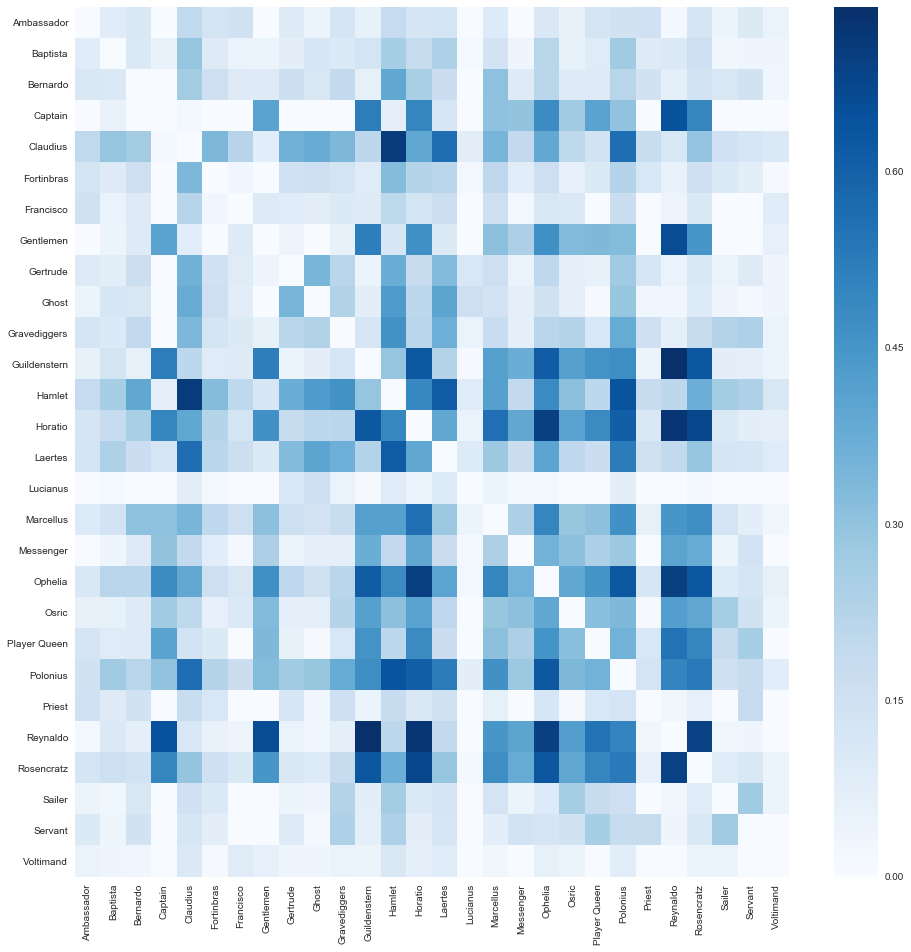

In [21]:
# You should not have to modify the following code
ser = pd.Series(list(similarities.values()),
                  index=pd.MultiIndex.from_tuples(similarities.keys()))
df = ser.unstack().fillna(0)
df.shape
sns.set(rc={"figure.figsize": (16, 16)})
sns.heatmap(df,cmap="Blues");

## Step 10: Repeat Steps 6-9 two more times, once using bigrams and once using trigrams (instead of single words)

**NOTE: You can copy the code and run it  or you can go _Above and Beyond_ and refactor your code above so that you create functions that take parameters (line the n for n-grams) and then call those functions**

### Above and Beyond Possibility
You might want to consider running the above analyses on other Shakespearean tragedies and compare the results to these.